# Lineare Regression

<font size = 3> Die Lineare Regression ist eine Methode um Zusammenhänge in Daten zu erkennen.
Aus diesen Zusammenhängen lasse sich dann Schlüsse auf neue unbekannte Daten ziehen und so eine Vorhersage machen.



In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Layout

### Einlesen der Daten 
<font size = 3> Auswahl zwischen Dataframe mit allen Attributen oder nur ausgewählten Attributen.

In [14]:
#df_studierende = pd.read_csv("df_studierende_complete.csv", sep = ";")
#cols = 30

df_studierende = pd.read_csv("df_studierende.csv", sep = ";")
cols = 7

df_studierende


,school,Medu,Fedu,studytime,failures,higher,Dalc,G3
0,0,4,4,2,0,1,1,11
1,0,1,1,2,0,1,1,11
2,0,1,1,2,0,1,2,12
3,0,4,2,3,0,1,1,14
4,0,3,3,2,0,1,1,13
...,...,...,...,...,...,...,...,...
644,1,2,3,3,1,1,1,10
645,1,3,1,2,0,1,1,16
646,1,1,1,2,0,1,1,9
647,1,3,1,1,0,1,3,10


### Daten vorbereiten
<font size = 3>Zuerst müssen die vorhandenen Daten in die Attribute und in die Labels aufgeteilt werden.
Danach müssen die Daten noch in Trainings und Testdaten unterteilt werden.

In [15]:
def data(df, cols):
    '''
    Aufteilen der Daten in Trainings und Testdaten.
    
    Parameters
    ----------
    df : DataFrame
        Ausgangs Dataframe mit allen vorhandenen Daten.
    cols : Int
        Gibt an bis zu welcher Spalte die Daten mit aufgenommen werden.
        So kann entschieden werden, ob beim Training alle Attribute oder 
        nur Attribute mit einer Korrelation von 0.2 mit einbezogen werden.

    Returns
    -------
    x_train, x_test, y_train, y_test : Array
        Trainings und Testdaten in Attribute (x) und Zielvariable aufgeteilt (y).
    '''
    
    x, y = df.values[:, 0:cols],df.values[:,-1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 3)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = data(df_studierende,cols)

### Model Aufstellen und mit den Daten trainieren

In [16]:
def linearreg_model(x,y):
    '''
    Trainieren der Suport Vector Regression.
    
    Parameters
    ----------
    x : Trainingsdaten (Attribute)
        
    y : Trainingsdaten (Label bzw. Zielwert)
    
    kernel : gewählte Kernelfunktion

    Returns
    -------
    model : Trainiertes model mit entsprechender Kernelfunktion.
    '''
    
    # Aufstellen des models
    model = LinearRegression()
    
    # Training 
    model.fit(x_train, y_train) 
    
    return model
model = linearreg_model(x_train, y_train)

In [17]:
def linear_regression(model):
    #print(f'Von sklearn bestimmte Funktion: y = {model.coef_[0]:.3f} * x + {model.intercept_:.3f}')
    print(f'Die von sklearn bestimmten Parameter:')
    for i in range(0,df_studierende.shape[1]-1):
        print(model.coef_[i])
    print(model.intercept_)
    return
linear_regression(model)

Die von sklearn bestimmten Parameter:
-1.2242350252441323
0.2746313630589995
0.0794148847395057
0.5398903086784345
-1.5667622582042335
1.4933173238085415
-0.5358014228462147
10.267369543581381


### Trainiertes Model mit Testdaten testen

In [18]:
def predict(model,x_test):
    
    y_pred = model.predict(x_test)

    return y_pred
y_pred = predict(model,x_test)

### Berechnung des Fehlers bei der Vorhersage für x_test

In [19]:
def MSE(real, pred):
    '''
    Berechnung des durchschnittlichen Quadratischen Fehlers von y_pred zu y_test.
    '''
    print(f'Der durchschnittliche Quadratische Fehler ist: {mean_squared_error(y_test, y_pred)}')
    MSE = mean_squared_error(real, pred)
    
    return MSE
MSE = MSE(y_test, y_pred)

Der durchschnittliche Quadratische Fehler ist: 6.827788943520568


### Visuelle Darstellung der Ergebnisse

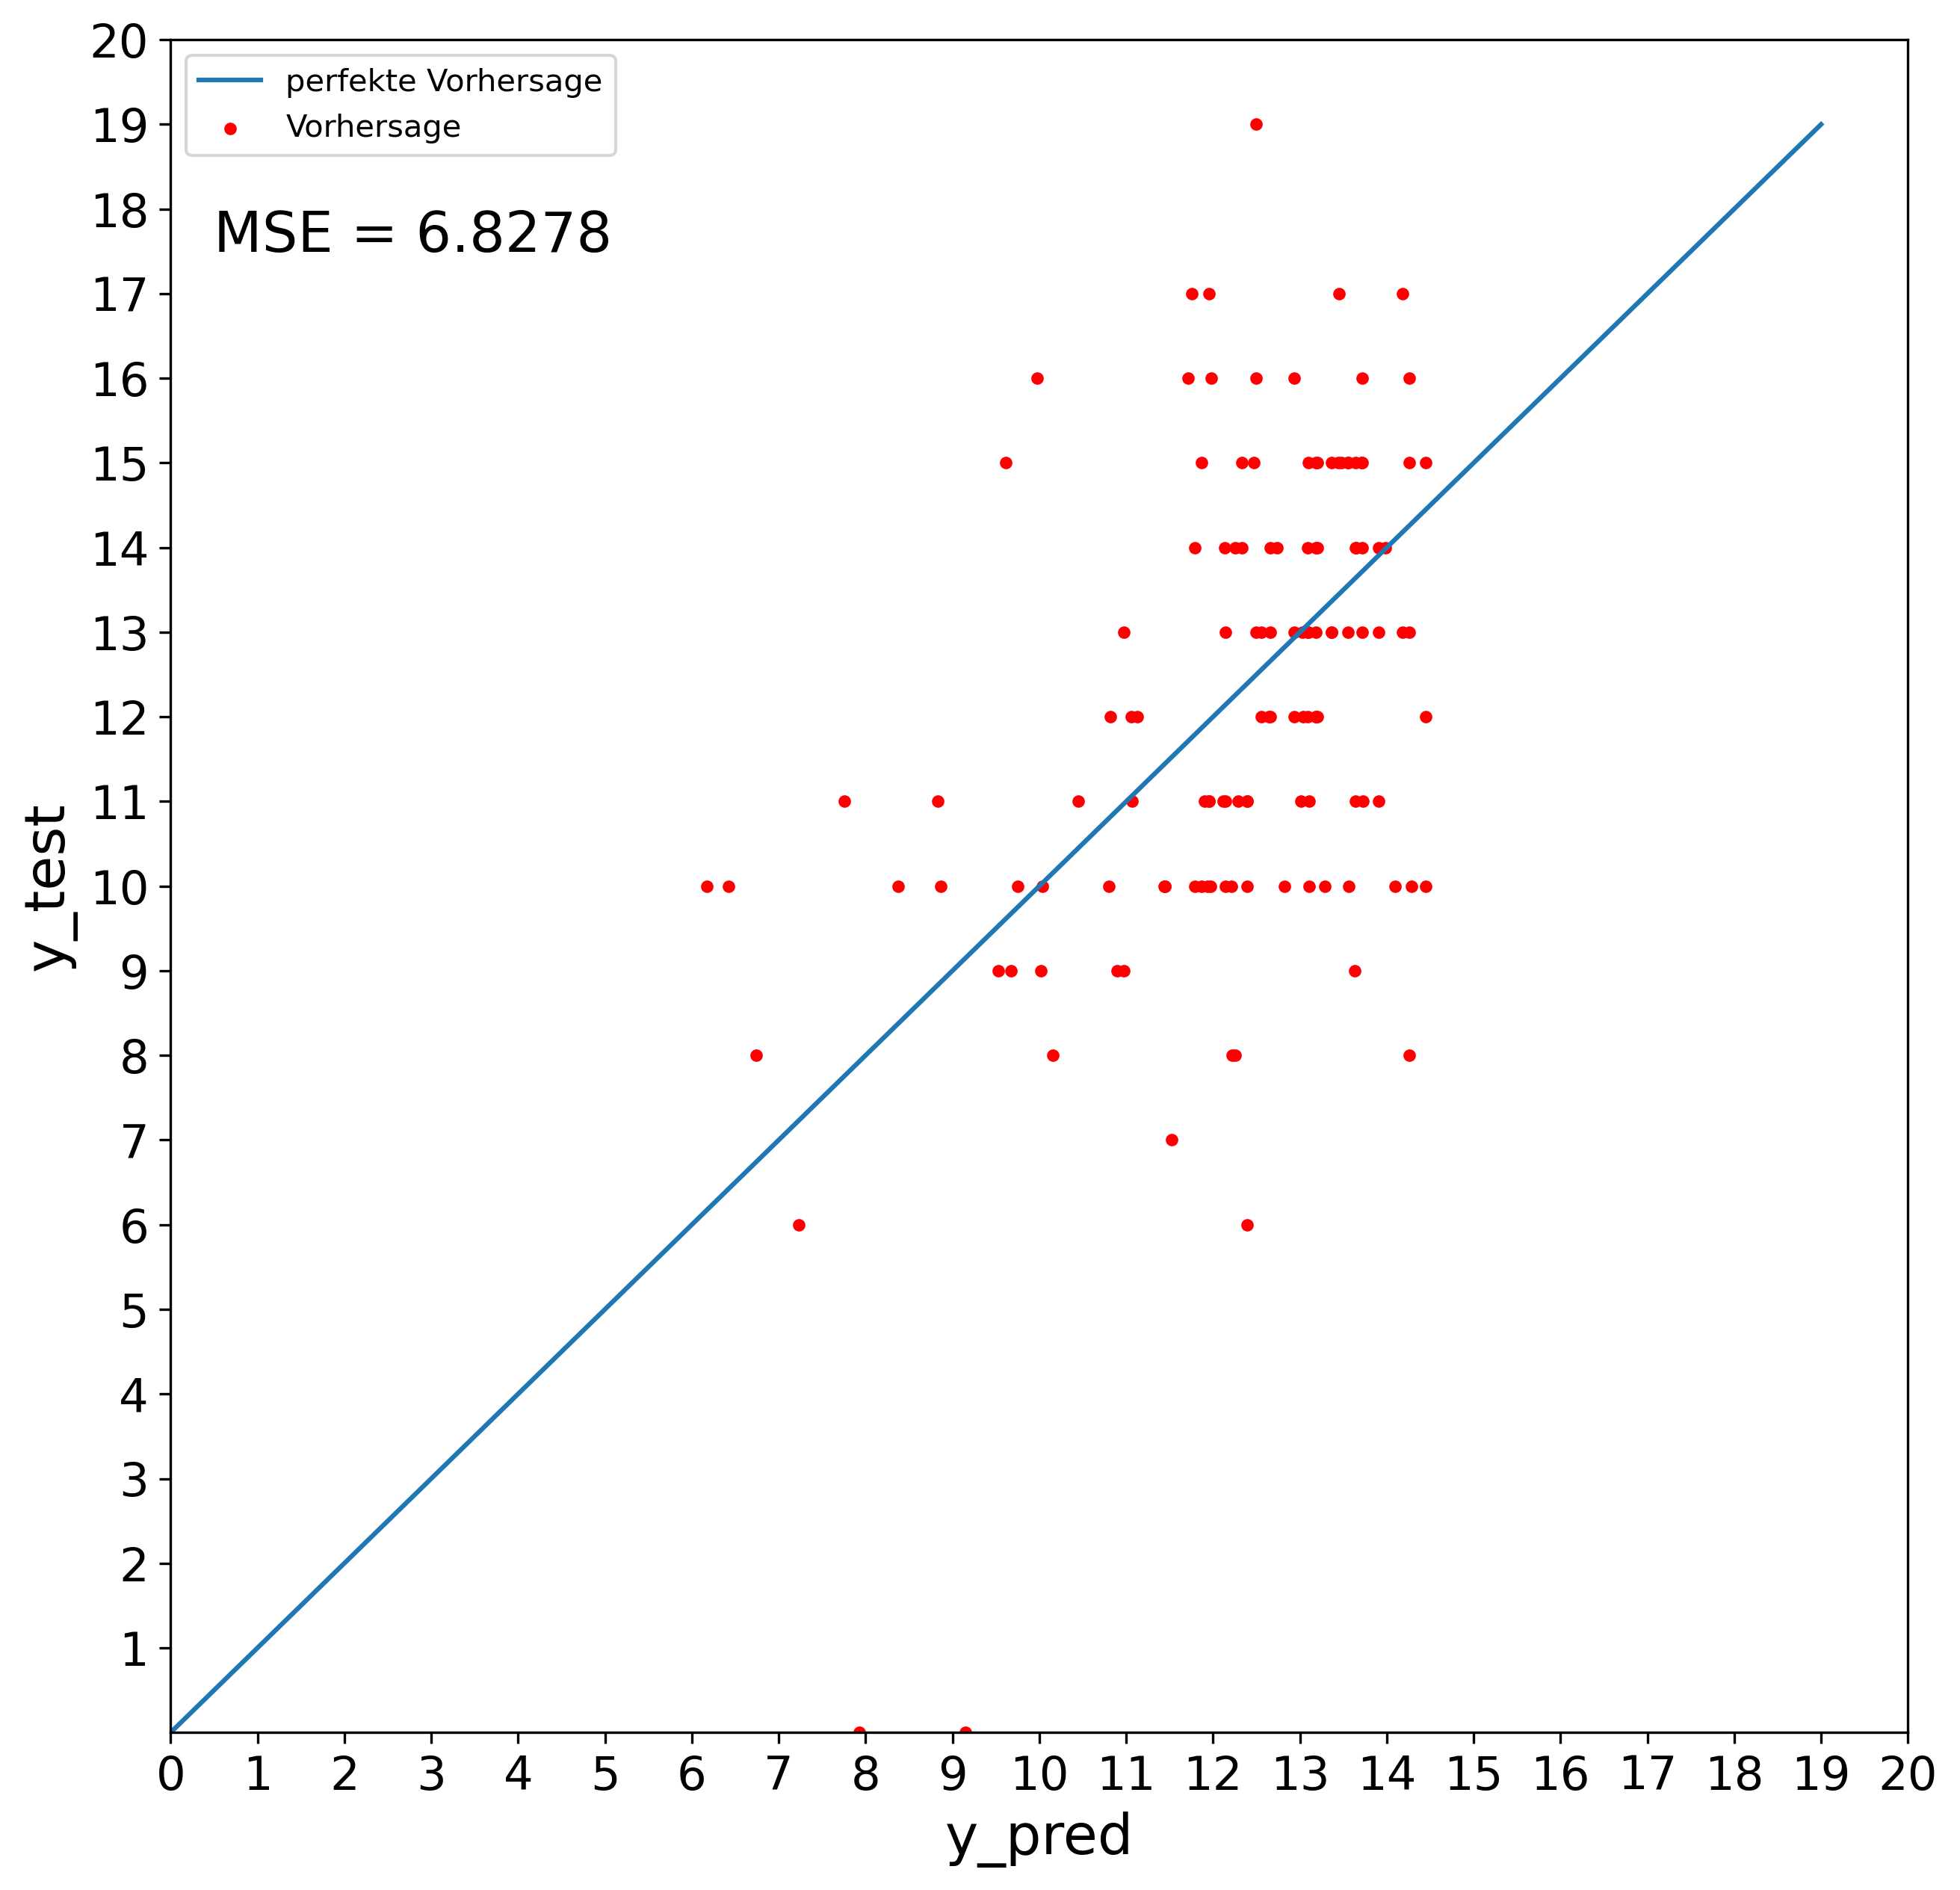

In [20]:
def plot(pred,real, model,MSE):
    '''
    Plotten der Ergebnisse y_pred
    '''
     
    ticks = [i for i in range(0,20+1)]

    plt.figure(dpi=300, figsize=(10,10))
    
    plt.plot(range(20),range(20))
    
    #plt.title('Lineare Regression mit ausgewählten Attributen', fontsize = 18)
    plt.scatter(pred, real, marker ='.', color = 'r')
    
    plt.text(0.5,17.5,'MSE = '+ str(round(MSE,4)), fontsize = 18)
    
    plt.legend(['perfekte Vorhersage','Vorhersage'])
    
    plt.xlabel('y_pred',fontsize=18)
    plt.xticks(ticks,fontsize=15)
    plt.xlim(0,20)
    
    plt.ylabel('y_test',fontsize=18)
    plt.yticks(ticks,fontsize=15)
    plt.ylim(0.001,20)
    
    plt.show()

    return
plot(y_pred,y_test, model, MSE)

### Differenz zwischen tatsächlichen Werten und der Vorhersage

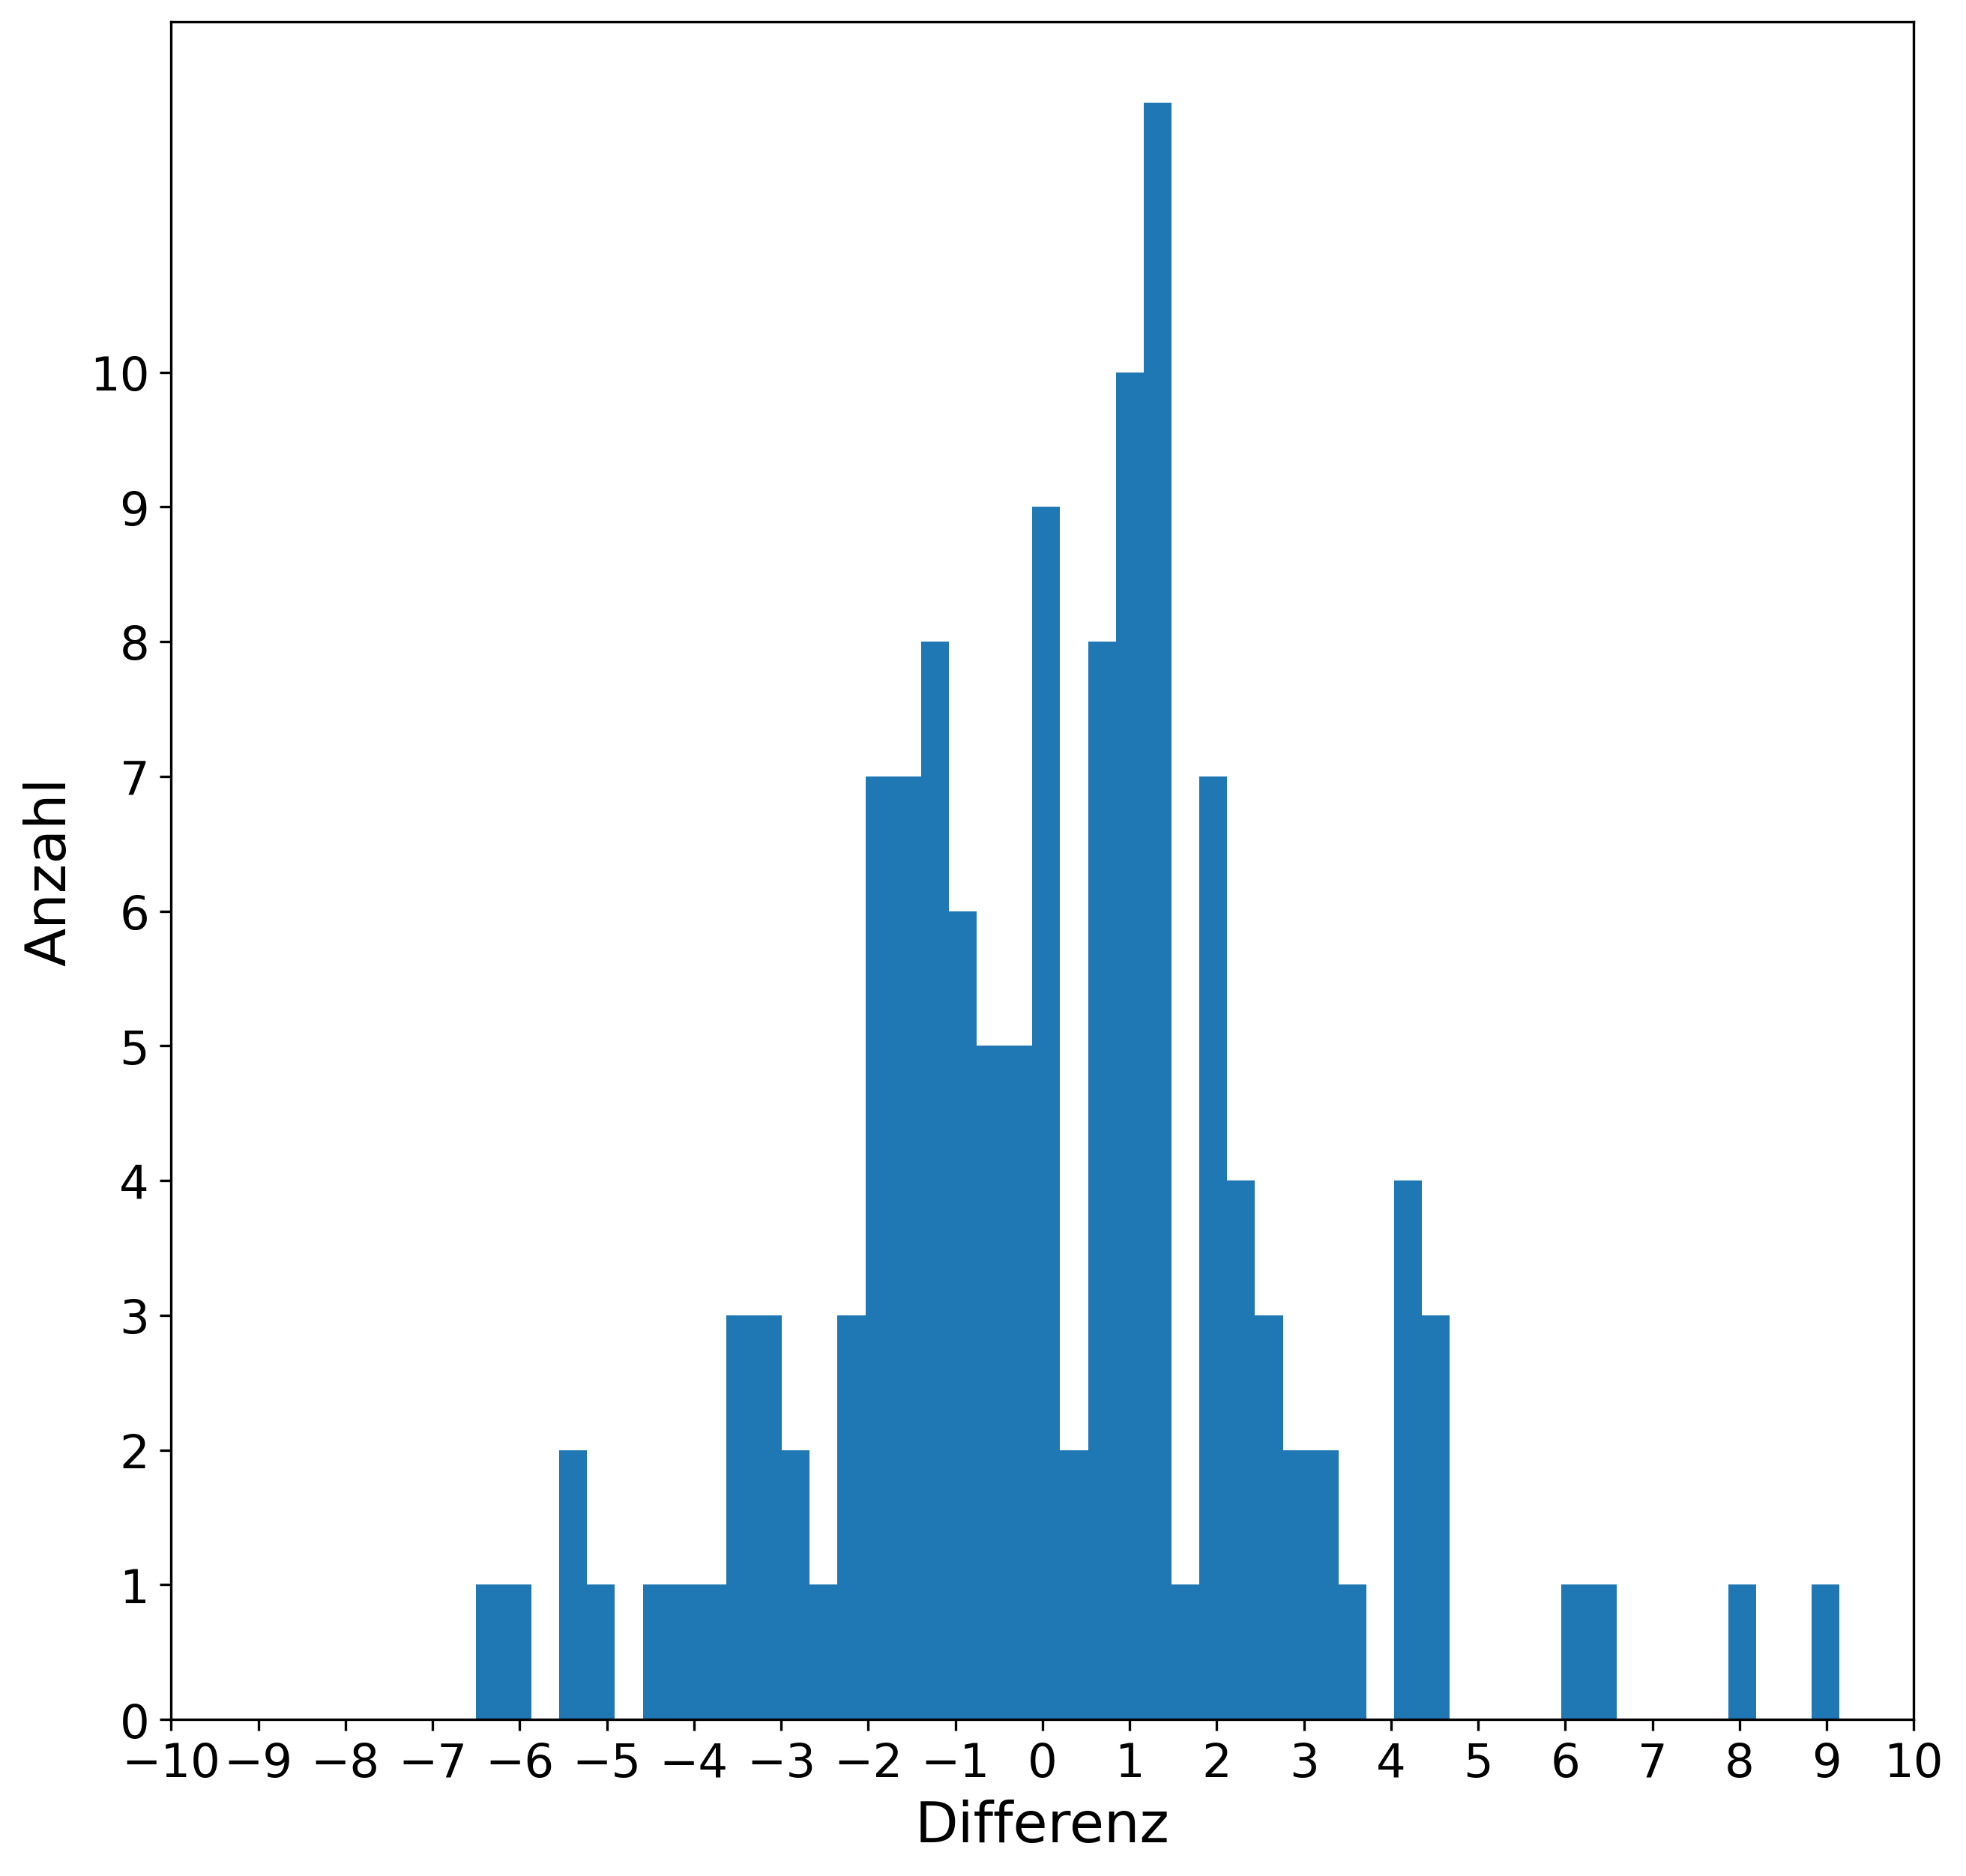

In [21]:
def diff_hist(pred,real):
    # berechnung der Differenzen
    diff = [pred[i]-real[i] for i in range(len(pred))]  
    x = np.linspace(min(diff),max(diff))
    
    plt.figure(dpi=300 , figsize=(10,10))
    plt.rcParams["figure.figsize"] = (10,10)
    
    plt.hist(diff, x)
    
    plt.xlabel('Differenz',fontsize=18)
    plt.xticks(range(-10,10+1),fontsize=15)
    plt.ylabel('Anzahl',fontsize=18)
    plt.yticks(range(0,10+1),fontsize=15)
    plt.show()
    
    return
diff_hist(y_pred,y_test)

### Definieren der Interacts

In [22]:
# Ab hier nur für df_studierende mit ausgewählten Attributen
style = {'description_width': 'initial'}
school = widgets.Dropdown(
    options=[('Gabriela Pereira School', 0), ('Mousinho da Silveira', 1)],
    description='Auf welche Schule gehen Sie?',
    style =style,
    layout = Layout(width='50%')
)

Medu = widgets.Dropdown(
    options=[('keine', 0), ('Grundschule', 1), ('Mittlere Reife', 2), ('Abitur', 3), ('höhere Ausbildung', 4)],
    description='Welchen Ausbildungsgrad hat Ihre Mutter?',
    style =style,
    layout = Layout(width='50%')
)

Fedu = widgets.Dropdown(
    options=[('keine', 0), ('Grundschule', 1), ('Mittlere Reife', 2), ('Abitur', 3), ('höhere Ausbildung', 4)],
    description='Welchen Ausbildungsgrad hat Ihr Vater?',
    style =style,
    layout = Layout(width='50%')
)

studytime = widgets.Dropdown(
    options=[('weniger als 2 Stunden', 1), ('2 bis 5 Stunden', 2), ('5 bis 10 Stunden', 3), ('mehr als 10 Stunden', 4)],
    description='Wieviel lernen Sie im Schnitt in der Woche?',
    style =style,
    layout = Layout(width='50%')
)

failures = widgets.Dropdown(
    options=[('0', 0), ('1', 1), ('2', 2), ('3', 3), ('>4', 4)],
    description='Wie oft sind Sie bereits durch den Kurs durchgefallen?',
    style =style,
    layout = Layout(width='50%')
)

higher = widgets.Dropdown(
    options=[('Ja', 1), ('Nein', 2)],
    description='Streben Sie eine höhere Ausbildung an?',
    style =style,
    layout = Layout(width='50%')
)

Dalc = widgets.Dropdown(
    options=[('sehr wenig', 1), ('wenig', 2), ('normal', 3), ('viel', 4), ('sehr viel', 5)],
    description='Täglicher Alkoholkonsum:',
    style =style,
    layout = Layout(width='50%')
)

In [23]:
def data_pred(school, Medu, Fedu, studytime, failures, higher, Dalc):
    '''
    Funktion, die anahnd der eingegebenen Daten einen neuen Datenpunkt zu vorhersage macht.
    
    Parameters
    ----------
    school, Medu, Fedu, studytime, failures, higher, Dalc : Attribute, die vom Anwender eingegeben werden

    Returns
    -------
    y_pred : 
        Vorhersage anhand der vorher angegebenen Attribute.
    '''
    
    #Zusammenfügen aller Informationen, die über die Interacts eingegangen sind
    data_interact = []
    for i in [school, Medu, Fedu, studytime, failures, higher, Dalc]:
        data_interact.append(i)

    data_interact = np.array(data_interact)
    data_interact = data_interact.reshape(1,len(data_interact))
    y_pred = predict(model,data_interact)
    print(f'Mit Ihren Angaben erreichen Sie am Ende des Schuljahres eine Punktzahl von {y_pred}.')
    return 

In [24]:
if cols == 7:
    interact(data_pred, school = school, Medu = Medu, Fedu = Fedu, studytime = studytime, failures = failures, higher = higher, Dalc = Dalc);


interactive(children=(Dropdown(description='Auf welche Schule gehen Sie?', layout=Layout(width='50%'), options…